<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E3-SongEmbeddingsVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Song Embeddings - Skipgram Recommender

In this notebook, we'll use human-made music playlists to learn song embeddings. We'll treat a playlist as if it's a sentence and the songs it contains as words. We feed that to the word2vec algorithm which then learns embeddings for every song we have. These embeddings can then be used to recommend similar songs. This technique is used by Spotify, AirBnB, Alibaba, and others. It accounts for a vast portion of their user activity, user media consumption, and/or sales (in the case of Alibaba).

The [dataset we'll use](https://www.cs.cornell.edu/~shuochen/lme/data_page.html) was collected by Shuo Chen from Cornell University. The dataset contains playlists from hundreds of radio stations from around the US.

## Importing packages and dataset

In [ ]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec
from urllib import request
import warnings
warnings.filterwarnings('ignore')

The playlist dataset is a text file where every line represents a playlist. That playlist is basically a series of song IDs.

In [ ]:
# Se obtiene la plaaylist de una url
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

# Se analiza el archivo del conjunto de datos de la lista de reproducción. Salta las dos primeras líneas como
# ellos solamente contiene metadata
lines = data.read().decode("utf-8").split('\n')[2:]

# Se eliminan la listas de reproducción con una sola canción
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]


The `playlists` variable now contains a python list. Each item in this list is a playlist containing song ids. We can look at the first two playlists here:

In [ ]:
print( 'Playlist #1:\n ', playlists[0], '\n')
print( 'Playlist #2:\n ', playlists[1])

Playlist #1:
  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '2', '42', '43', '44', '45', '46', '47', '48', '20', '49', '8', '50', '51', '52', '53', '54', '55', '56', '57', '25', '58', '59', '60', '61', '62', '3', '63', '64', '65', '66', '46', '47', '67', '2', '48', '68', '69', '70', '57', '50', '71', '72', '53', '73', '25', '74', '59', '20', '46', '75', '76', '77', '59', '20', '43'] 

Playlist #2:
  ['78', '79', '80', '3', '62', '81', '14', '82', '48', '83', '84', '17', '85', '86', '87', '88', '74', '89', '90', '91', '4', '73', '62', '92', '17', '53', '59', '93', '94', '51', '50', '27', '95', '48', '96', '97', '98', '99', '100', '57', '101', '102', '25', '103', '3', '104', '105', '106', '107', '47', '108', '109', '110', '111', '112', '113', '25', '63', '62', '114', '115', '84', '116', '117',

## Entrenando el modelo de Word2Vec
El conjunto de datos ahora tiene la forma que el modelo Word2Vec espera como entrada. Pasamos el conjunto de datos al modelo.

In [ ]:
# Se crea un modelo Word2Vec utilizando un corpus de texto representado por la variable playlists con un tamaño de 32 palabras el vector, una ventana de 20 palabras para dar contexto, 50 muestra negativas y que al menos una palabra debe tener en el corpus para ser considerada durante el entrenamiento
model = Word2Vec(playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4)

The model is now trained. Every song has an embedding. We only have song IDs, though, no titles or other info. Let's grab the song information file.

## Song Title and Artist File
Let's load and parse the file containing song titles and artists

In [ ]:
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]

In [ ]:
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df.set_index('id')

In [ ]:
songs_df.head()

,title,artist
id,,
0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,Get Back Up (w\/ Chris Brown),T.I.
3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,Whip My Hair,Willow


### Exercise:

Build visualization for the embeddings of the song recommender.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

"""
Pre-procesamiento
"""

#Se hace el preprocesamiento del modelo de vocabulario para hacer las visualizaciones

words_vocab= list(model.wv.key_to_index.keys())#Se toman todas las palabras del vocabulario
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Se eliminan los stopword para que la visualización sea más limpia
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

Size of Vocabulary: 75261
Few words in Vocabulary ['20065', '5', '46', '7233', '20627', '19477', '20068', '60', '82', '9659', '292', '6', '20055', '344', '1', '14', '475', '27076', '90', '1813', '20064', '6471', '13', '7261', '19781', '2378', '50', '2373', '7303', '20054', '2198', '6488', '77', '70', '1795', '2375', '19783', '9752', '288', '19782', '7255', '2251', '20047', '25', '18440', '2185', '19778', '242', '2218', '85']
Size of Vocabulary without stopwords: 75261
Few words in Vocabulary without stopwords ['20065', '5', '46', '7233', '20627', '19477', '20068', '60', '82', '9659', '292', '6', '20055', '344', '1', '14', '475', '27076', '90', '1813', '20064', '6471', '13', '7261', '19781', '2378', '50', '2373', '7303', '20054']


In [ ]:
# Se busca palabras similares para cada palabra en la serie keys utilizando un modelo Word2Vec (model.wv) y almacena las palabras similares y sus embeddings correspondientes en word_clusters y embedding_clusters, respectivamente. Además, cuenta cuántas palabras en keys están presentes en el vocabulario del modelo

keys = songs_df['title']
topn = 30
embedding_clusters = []
word_clusters = []
c=0
c0 = 0
for word in keys:
    c0=c0+1
    if word in list(model.wv.key_to_index.keys()):  # Verificamos si la palabra está presente en el vocabulario del modelo
        c=c+1
        embeddings = []
        words = []
        for similar_word, _ in model.wv.most_similar(word, topn=30):
            words.append(similar_word)
            embeddings.append(model.wv[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

print(c)
print(c0)

63
75263


In [ ]:
"""
Conversion a 2d
"""

from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

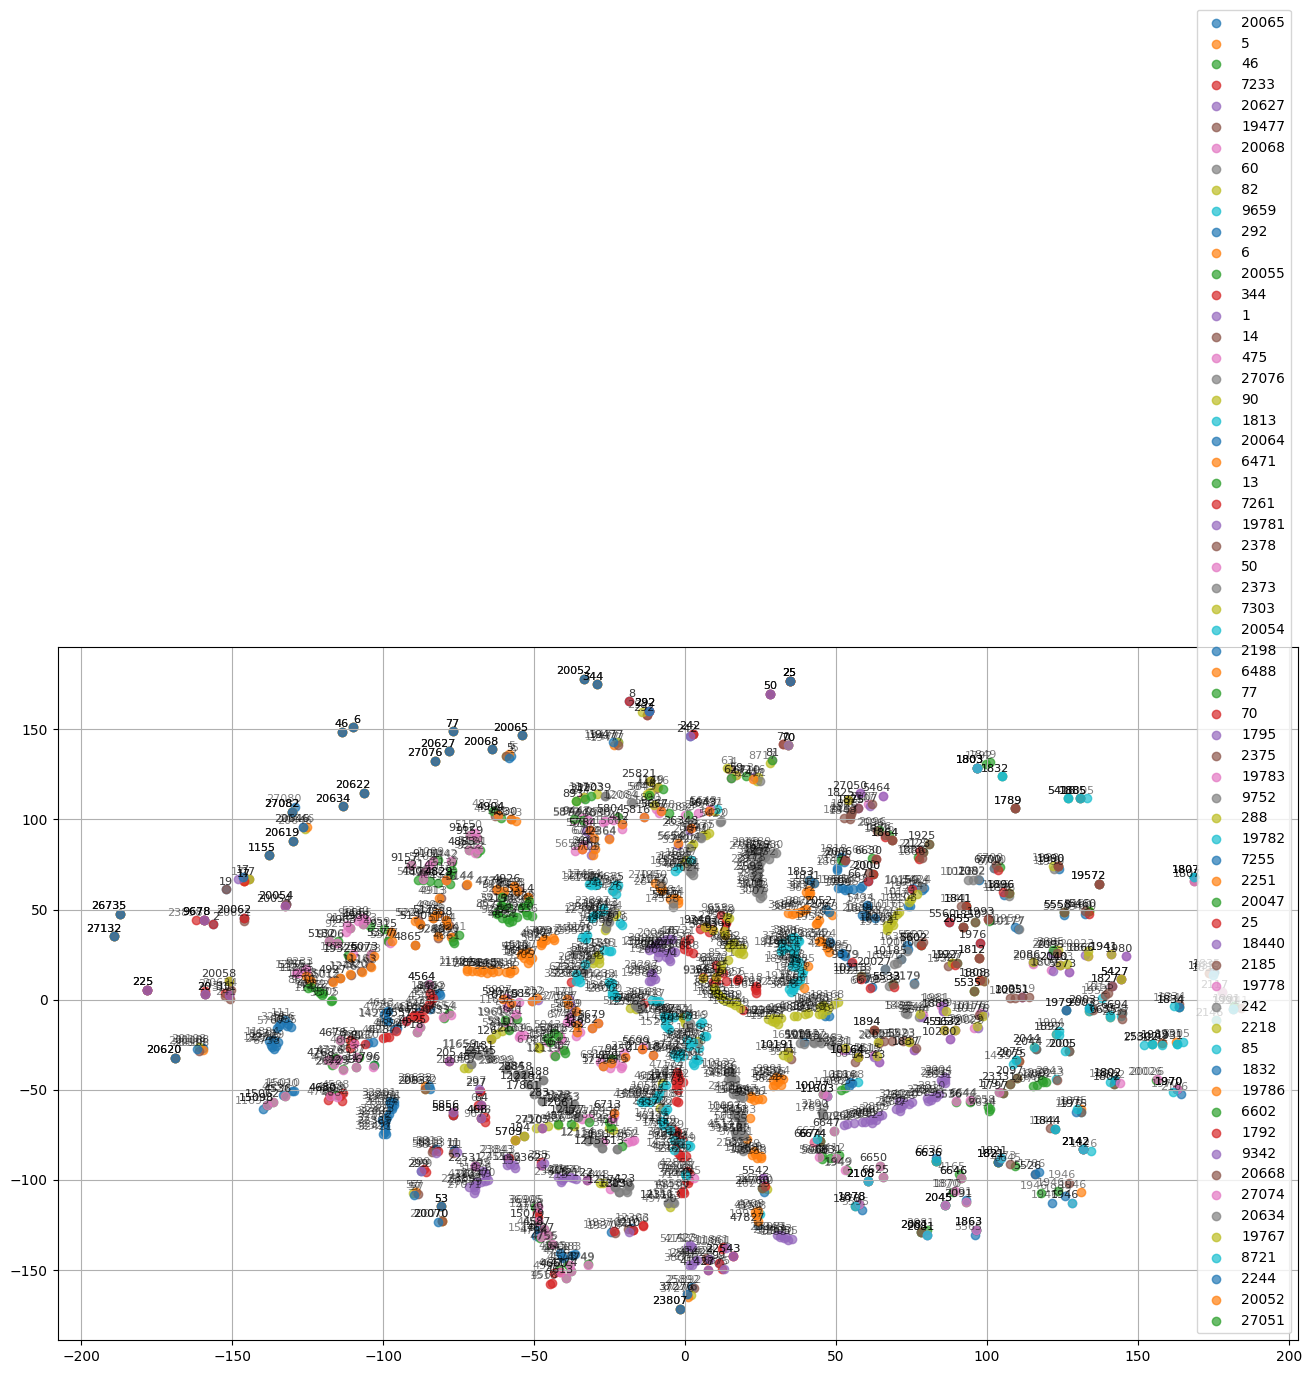

In [ ]:
"""
Hyperparameters of TSNE
1. n_components: The number of components, i.e., the dimension of the value space
2. perplexity: The number of effective neighbours
3. n_iter: Maximum number of iterations for the optimization.
4. init: Initialization of embedding.

t-SNE requires good amount of hyperparameter tuning to give effective results.
More details on the hyperparameters can be found in the official [docs]
(https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).
It is very easy to misread tsne too. This [article](https://distill.pub/2016/misread-tsne/)
provides more deatils about it.

"""


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

#script para construir graficos bidimensionales usando Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))


    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()



tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)